In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import random
import requests
import json

#Installing citipy
from citipy import citipy

#API key
from api_key import api_key
#print(api_key)

In [74]:
#Seeding random values, if needed
random.seed(100)

#Empty lists for iteration
locat = []
t_lat = []
t_lng = []

#Generate random numbers for coordinates, then pass through citipy 
for i in range(20):
    rn_lat = round(random.uniform(-90, 90), 4)
    rn_lng = round(random.uniform(-180, 180), 4)
    
    coord = citipy.nearest_city(rn_lat, rn_lng)

    name_cit = coord.city_name
    name_con = coord.country_code
    
    locat.append(f'{name_cit},{name_con}')
    t_lat.append(rn_lat)
    t_lng.append(rn_lng)
    
#print(locat)

In [75]:
#Removing duplicate values
locat = list(set(locat))

#len(locat)
#print(locat)

In [76]:
#Generate geolocation query links to pass through API
url_geo = 'http://api.openweathermap.org/geo/1.0/direct?q='

q_geo = []
city = []
country = []

for l in locat:
    q_geo.append(url_geo + l + '&appid=' + api_key)
    
    locat_split = l.split(',')
    city.append(locat_split[0])
    country.append(locat_split[1])
    
#len(q_geo)
#q_geo

In [86]:
#Generating API responses, finding true coordinates
lat = []
lng = []
gg = []

for qg in q_geo:
    georesponse = requests.get(qg)
    geodata = georesponse.json()
    gg.append(geodata)
    
    if geodata == []:
        continue
    else:
        true_lat = geodata[0]['lat']
        true_lng = geodata[0]['lon']
        
        lat.append(true_lat)
        lng.append(true_lng)

In [78]:
#Adjust length of cities and countries according to coordinates
for d in range(len(gg) - 1):
    if gg[d] == []:
        del city[d]
        del country[d]

In [81]:
#DataFrame for city information
cities_df = pd.DataFrame({'City': city,
                         'Country': country,
                         'Lat': lat,
                         'Lng': lng})

#cities_df.head()

In [82]:
cities_df

,City,Country,Lat,Lng
0,fort nelson,ca,58.806207,-122.694270
1,thompson,ca,55.743347,-97.863464
2,ambilobe,mg,-13.194439,49.049956
3,duliby,ua,49.454861,24.372175
4,abay,kz,43.211494,76.761475
5,upernavik,gl,72.784739,-56.146963
6,pacific grove,us,36.621138,-121.917801
7,cape town,za,-33.928992,18.417396
8,bad doberan,de,54.105858,11.902606
9,airai,pw,7.359934,134.560115


In [93]:
#Generate weather data query links to pass through API

url_wthr = 'https://api.openweathermap.org/data/2.5/weather?'
q_wthr = []

for w in range(len(lat)):
    
    q_lat = 'lat=' + str(lat[w])
    q_lng = '&lon=' + str(lng[w])
    unit = '&units=imperial'
    q_wthr.append(url_wthr + q_lat + q_lng + unit+ '&appid=' + api_key)

In [94]:
len(q_wthr)

16

In [95]:
temperatures = []
#main, temp(F)
humidity = []
#main, humidity(%)
cloudiness = []
#clouds, all(%)
windspeed = []
#wind, speed(mph)

for qw in q_wthr:
    wthresponse = requests.get(qw)
    wthdata = wthresponse.json()
    
    tempf = wthdata['main']['temp']
    humid = wthdata['main']['humidity']
    cloud = wthdata['clouds']['all']
    winds = wthdata['wind']['speed']
    
    temperatures.append(tempf)
    humidity.append(humid)
    cloudiness.append(cloud)
    windspeed.append(winds)

In [96]:
cities_df['Current Temp (F)'] = temperatures
cities_df['Humidity (%)'] = humidity
cities_df['Cloudiness (%)'] = cloudiness
cities_df['Wind Speed (mph)'] = windspeed

In [97]:
cities_df

,City,Country,Lat,Lng,Current Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,fort nelson,ca,58.806207,-122.694270,42.60,93,100,2.44
1,thompson,ca,55.743347,-97.863464,22.24,52,100,17.98
2,ambilobe,mg,-13.194439,49.049956,74.05,83,16,4.63
3,duliby,ua,49.454861,24.372175,51.04,94,86,9.46
4,abay,kz,43.211494,76.761475,52.20,80,100,1.74
5,upernavik,gl,72.784739,-56.146963,10.65,85,16,10.71
6,pacific grove,us,36.621138,-121.917801,59.54,74,0,11.99
7,cape town,za,-33.928992,18.417396,57.42,79,20,8.05
8,bad doberan,de,54.105858,11.902606,43.93,82,99,18.95
9,airai,pw,7.359934,134.560115,75.60,94,75,4.61


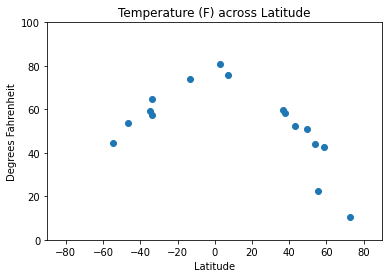

In [102]:
plt.scatter(cities_df['Lat'], cities_df['Current Temp (F)'])

plt.xlim(-90, 90)
plt.ylim(0, 100)

plt.xlabel('Latitude')
plt.ylabel('Degrees Fahrenheit')

plt.title('Temperature (F) across Latitude')
plt.show()

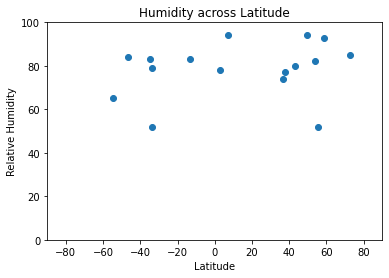

In [103]:
plt.scatter(cities_df['Lat'], cities_df['Humidity (%)'])

plt.xlim(-90, 90)
plt.ylim(0, 100)

plt.xlabel('Latitude')
plt.ylabel('Relative Humidity')

plt.title('Humidity across Latitude')
plt.show()

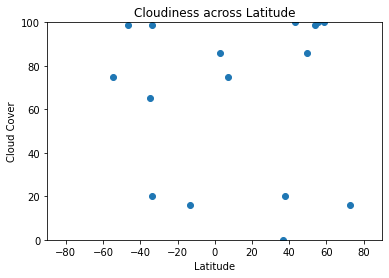

In [104]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness (%)'])

plt.xlim(-90, 90)
plt.ylim(0, 100)

plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')

plt.title('Cloudiness across Latitude')
plt.show()

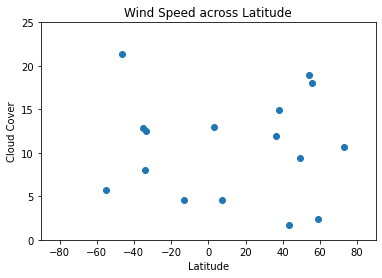

In [106]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed (mph)'])

plt.xlim(-90, 90)
plt.ylim(0, 25)

plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')

plt.title('Wind Speed across Latitude')
plt.show()